<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

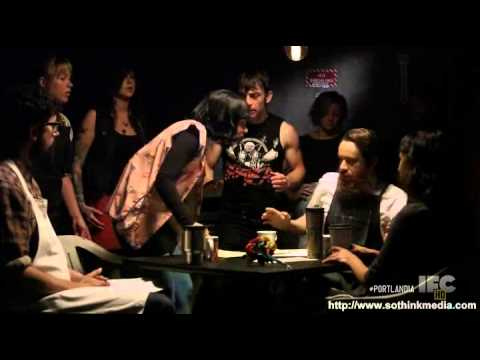

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'C:\\Users\\Ravi\\Documents\\Lambda School\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [4]:
import pandas as pd

url = 'C:\\Users\\Ravi\\Documents\\Lambda School\\DS-Unit-4-Sprint-1-NLP\\module1-text-data\\data\\yelp_coffeeshop_review_data.csv'

shops = pd.read_csv(url)
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Removing strings from star_rating column
shops.star_rating = shops.star_rating.str.replace('star rating', "")
shops.star_rating = shops.star_rating.astype(float)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0


In [14]:
df = shops.copy()

In [15]:
# Stripping white spaces in text column
df.full_review_text = [item.strip().lower() for item in df['full_review_text']]
print(df.full_review_text.head())
df.head()

0    11/25/2016 1 check-in love love loved the atmo...
1    12/2/2016 listed in date night: austin, ambian...
2    11/30/2016 1 check-in listed in brunch spots i...
3    11/25/2016 very cool decor! good drinks nice s...
4    12/3/2016 1 check-in they are located within t...
Name: full_review_text, dtype: object


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0


In [16]:
# Function for keeping only alpha characters
import re

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [17]:
df.full_review_text = df.full_review_text.apply(tokenize)
df.full_review_text.head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: full_review_text, dtype: object

In [18]:
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,"[checkin, love, love, loved, the, atmosphere, ...",5.0
1,The Factory - Cafe With a Soul,"[listed, in, date, night, austin, ambiance, in...",4.0
2,The Factory - Cafe With a Soul,"[checkin, listed, in, brunch, spots, i, loved,...",4.0
3,The Factory - Cafe With a Soul,"[very, cool, decor, good, drinks, nice, seatin...",2.0
4,The Factory - Cafe With a Soul,"[checkin, they, are, located, within, the, nor...",4.0


## Using Spacy

In [29]:
# Creating copy of dataframe
df2 = shops.copy()

In [30]:
# Stripping white spaces in text column
df2.full_review_text = [item.strip().lower() for item in df2['full_review_text']]
print(df2.full_review_text.head())
df2.head()

0    11/25/2016 1 check-in love love loved the atmo...
1    12/2/2016 listed in date night: austin, ambian...
2    11/30/2016 1 check-in listed in brunch spots i...
3    11/25/2016 very cool decor! good drinks nice s...
4    12/3/2016 1 check-in they are located within t...
Name: full_review_text, dtype: object


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0


In [31]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [33]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df2['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df2['tokens'] = tokens

In [34]:
df2.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0,"[11/25/2016, 1, check-in, love, love, loved, t..."
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0,"[12/2/2016, listed, in, date, night:, austin,,..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0,"[11/30/2016, 1, check-in, listed, in, brunch, ..."
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0,"[11/25/2016, very, cool, decor!, good, drinks,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0,"[12/3/2016, 1, check-in, they, are, located, w..."


In [35]:
df2['token_count'] = [len(token) for token in df2['tokens']]

In [36]:
df2.head()

,coffee_shop_name,full_review_text,star_rating,tokens,token_count
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0,"[11/25/2016, 1, check-in, love, love, loved, t...",99
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0,"[12/2/2016, listed, in, date, night:, austin,,...",50
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0,"[11/30/2016, 1, check-in, listed, in, brunch, ...",253
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0,"[11/25/2016, very, cool, decor!, good, drinks,...",72
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0,"[12/3/2016, 1, check-in, they, are, located, w...",117


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Visualizing Token Counts

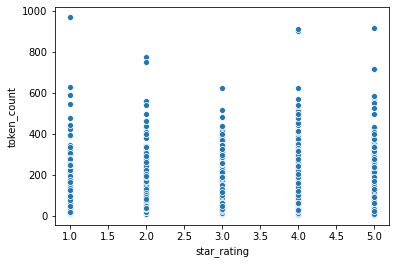

In [38]:
import seaborn as sns

sns.scatterplot(x=df2['star_rating'], y=df2['token_count'], data=df2);

The above scatterplot shows the distribution of token counts for each review against its star rating. This shows an interesting insight. It seems that customers who left longer reviews appear to have left either a lower rating or a higher rating based on their respective experiences.

In [172]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [202]:
word_count = count(df2.tokens)
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,the,6847,34649,1.0,0.043232,0.043232,0.899028
1,and,6853,26442,2.0,0.032992,0.076224,0.899816
5,a,6240,22657,3.0,0.028269,0.104493,0.819328
62,i,5511,19990,4.0,0.024942,0.129435,0.723608
26,to,5638,17008,5.0,0.021221,0.150655,0.740284


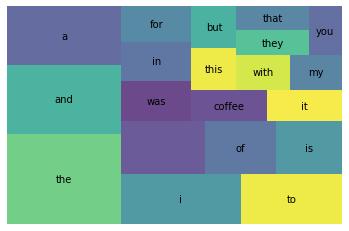

In [203]:
wc_top20 = word_count[word_count['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Getting rid of stop words and further data cleaning

In [ ]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

In [204]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df2['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.like_num == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df2['tokens'] = tokens

In [205]:
df2.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0,"[11/25/2016, check-in, love, love, loved, atmo..."
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0,"[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0,"[11/30/2016, check-in, listed, brunch, spots, ..."
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0,"[12/3/2016, check-in, located, northcross, mal..."


### Lemmatizing Tokens Using Spacy

In [206]:
# function for lemmatizing tokens
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [209]:
df2['lemmas'] = df2['full_review_text'].apply(get_lemmas)
df2.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, 1, check, love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night, austin, ambianc..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, 1, check, list, brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor, good, drink, nice, s..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, 1, check, locate, northcross, mall..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

